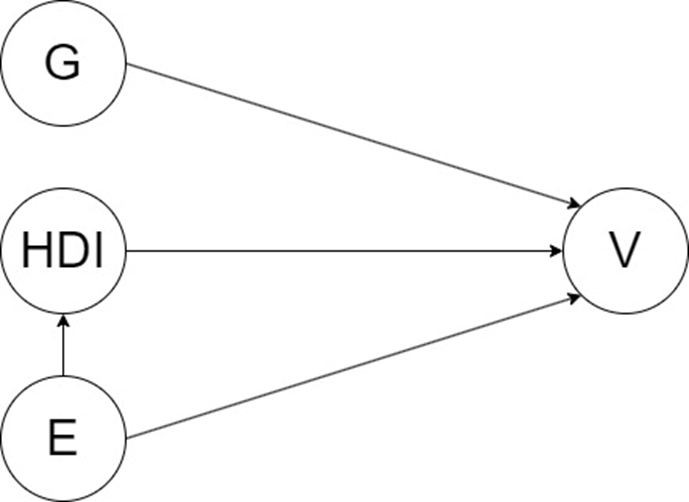

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel


file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data.head()


,Year,State,Democratic %,Gun ownership %,HDI,Unemployment %
0,1992,Alabama,0.409,0.552,0.839,0.07525
1,1996,Alabama,0.432,0.568,0.850,0.05208
2,2000,Alabama,0.416,0.538,0.853,0.04625
3,2004,Alabama,0.368,0.516,0.861,0.05575
4,2008,Alabama,0.387,0.503,0.867,0.05883


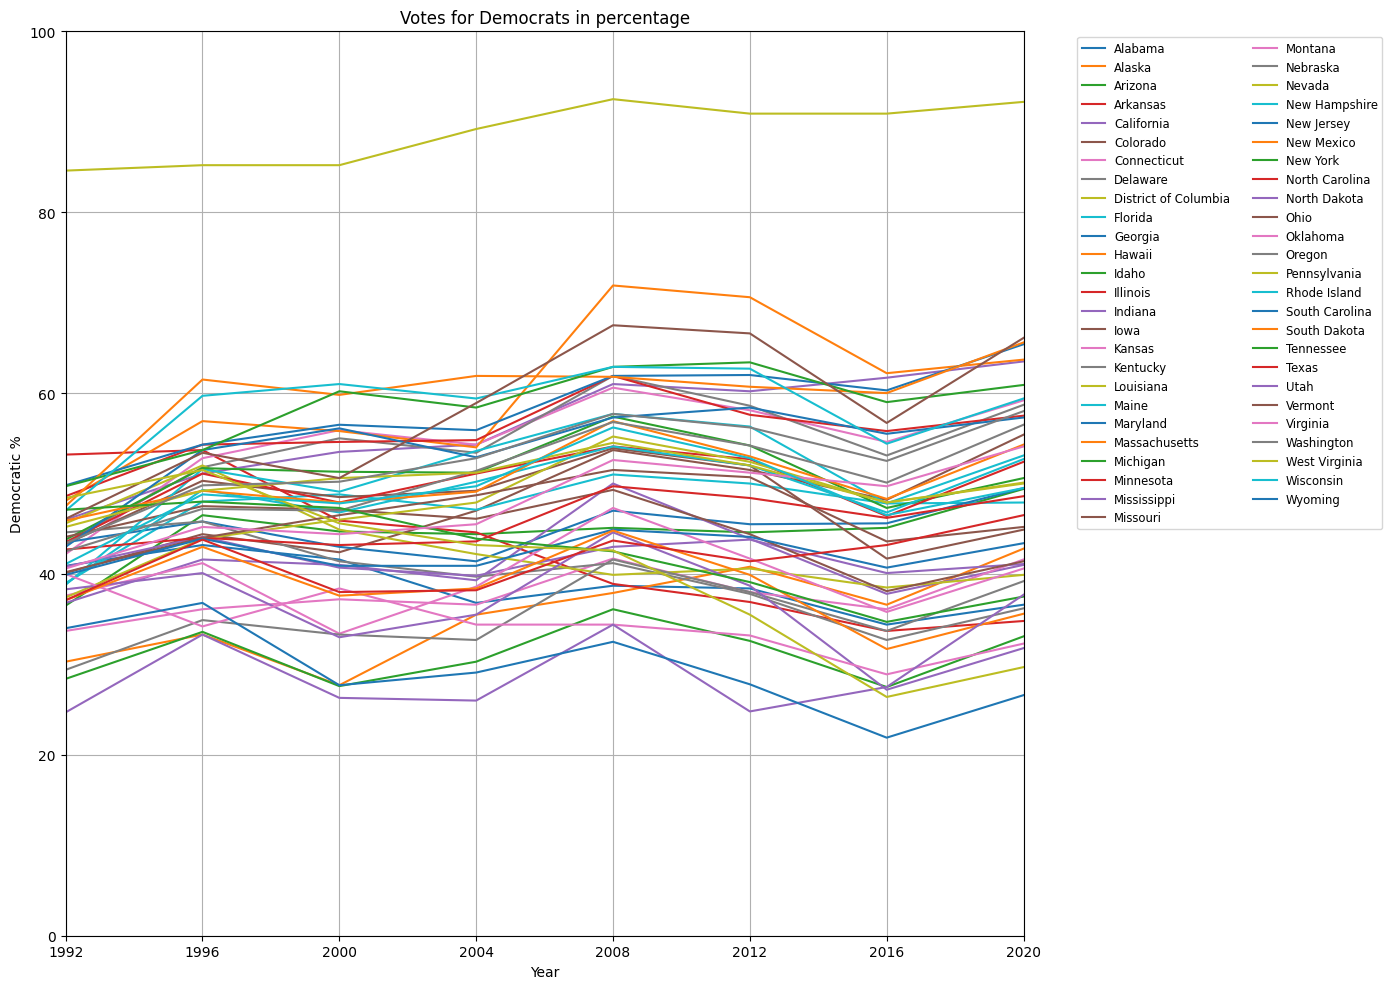

In [27]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"] * 100, label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


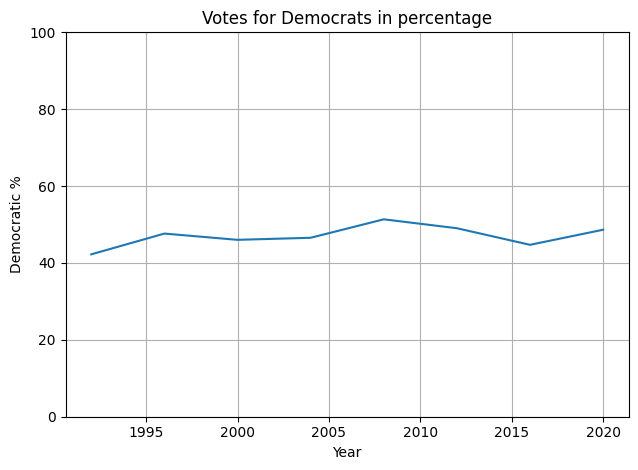

In [28]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean()*100 for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
# plt.xticks(np.linspace(1992, 2020, 8))
# plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


In [29]:
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

print(data.isna().sum())

data = data.dropna()

print("Columns in the dataframe:", data.columns)

data['Year'] = data['Year'].astype(str).str.strip()

stan_file_path = 'model_1.stan'  
model_1 = CmdStanModel(stan_file=stan_file_path)

input_model_1 = {
    'N': len(data), 
    'V': data['Democratic %'].values, 
    'G': data['Gun ownership %'].values, 
    'HDI': data['HDI'].values
}

fit = model_1.sample(data=input_model_1, chains=1, seed=28052020, show_console=True)

df_fit = fit.draws_pd()


Year               0
State              0
Democratic %       0
Gun ownership %    0
HDI                0
Unemployment %     0
dtype: int64
Columns in the dataframe: Index(['Year', 'State', 'Democratic %', 'Gun ownership %', 'HDI',
       'Unemployment %'],
      dtype='object')


16:57:54 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model_1.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1.exe
16:58:49 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1.exe
16:58:49 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\zg1oxgzd.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

16:58:53 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 1.25 seconds (Warm-up)
Chain [1] 2.039 seconds (Sampling)
Chain [1] 3.289 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


16:58:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1.stan', line 16, column 4 to column 53)
16:58:53 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 19 divergent transitions (1.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [30]:
df_fit.head()


,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,V_pred[399],V_pred[400],V_pred[401],V_pred[402],V_pred[403],V_pred[404],V_pred[405],V_pred[406],V_pred[407],V_pred[408]
0,1.0,1.0,1.0,704.810,0.795203,0.089032,5.0,31.0,0.0,-703.962,...,0.376446,0.555466,0.469926,0.592177,0.555061,0.516173,0.673604,0.462388,0.641430,0.588340
1,1.0,2.0,2.0,705.377,0.946654,0.089032,3.0,7.0,0.0,-703.508,...,0.747141,0.495734,0.418341,0.418282,0.568372,0.480604,0.499708,0.363784,0.540267,0.592486
2,1.0,3.0,3.0,705.241,0.991971,0.089032,5.0,31.0,0.0,-703.198,...,0.456980,0.356896,0.434042,0.579353,0.397309,0.631784,0.562378,0.503968,0.349340,0.516854
3,1.0,4.0,4.0,704.019,1.000000,0.089032,5.0,47.0,0.0,-703.757,...,0.391388,0.305320,0.480970,0.342251,0.634027,0.405418,0.614858,0.669549,0.489069,0.553352
4,1.0,5.0,5.0,704.854,0.802481,0.089032,4.0,31.0,0.0,-702.285,...,0.356894,0.455883,0.496308,0.336807,0.698636,0.460576,0.491405,0.517890,0.667015,0.454791


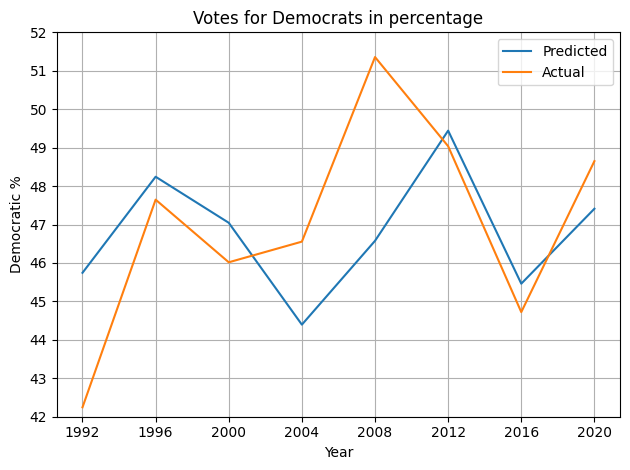

In [31]:
predicted_democratic_votes = []
mean_predicted_democratic_votes = []

for i in range(408):
    predicted_democratic_votes.append(df_fit[f'V_pred[{i+1}]'].sample())


for i in range(8):
    mean_predicted_democratic_votes.append(np.mean(predicted_democratic_votes[i*51:i*51+51])*100)

plt.plot(data["Year"].unique(), mean_predicted_democratic_votes, label="Predicted")
plt.plot(data["Year"].unique(), mean_democratic_votes, label = "Actual")

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.yticks(np.linspace(42, 52, 11))
# plt.xlim([1992, 2020])
plt.ylim([42, 52])
plt.show()

In [32]:
stan_file_path = 'model1_with_priors.stan'

# Compile the Stan model
model_1 = CmdStanModel(stan_file=stan_file_path)

# Sample from the model
fit = model_1.sample(data=input_model_1, chains=1, seed=28052020, show_console=True)

# Extract the draws
df_fit = fit.draws_pd()
print(df_fit.head())

16:58:54 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\dr23e6g0.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

16:59:02 - cmdstanpy - INFO - Chain [1] done processing
16:59:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)


Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 3.404 seconds (Warm-up)
Chain [1] 4.388 seconds (Sampling)
Chain [1] 7.792 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
   chain__  iter__  draw__     lp__  accept_stat__  stepsize__  treedepth__  \
0      1.0     1.0     1.0  710.233       0.832667    0.019895          7.0   
1      1.0     2.0     2.0  710.229       0.999601    0.019895          7.0   
2      1.0     3.0     3.0  711.227       0.999587    0.019895          7.0   
3      1.0     4.0     4.0  711.047       0.943396    0.019895    

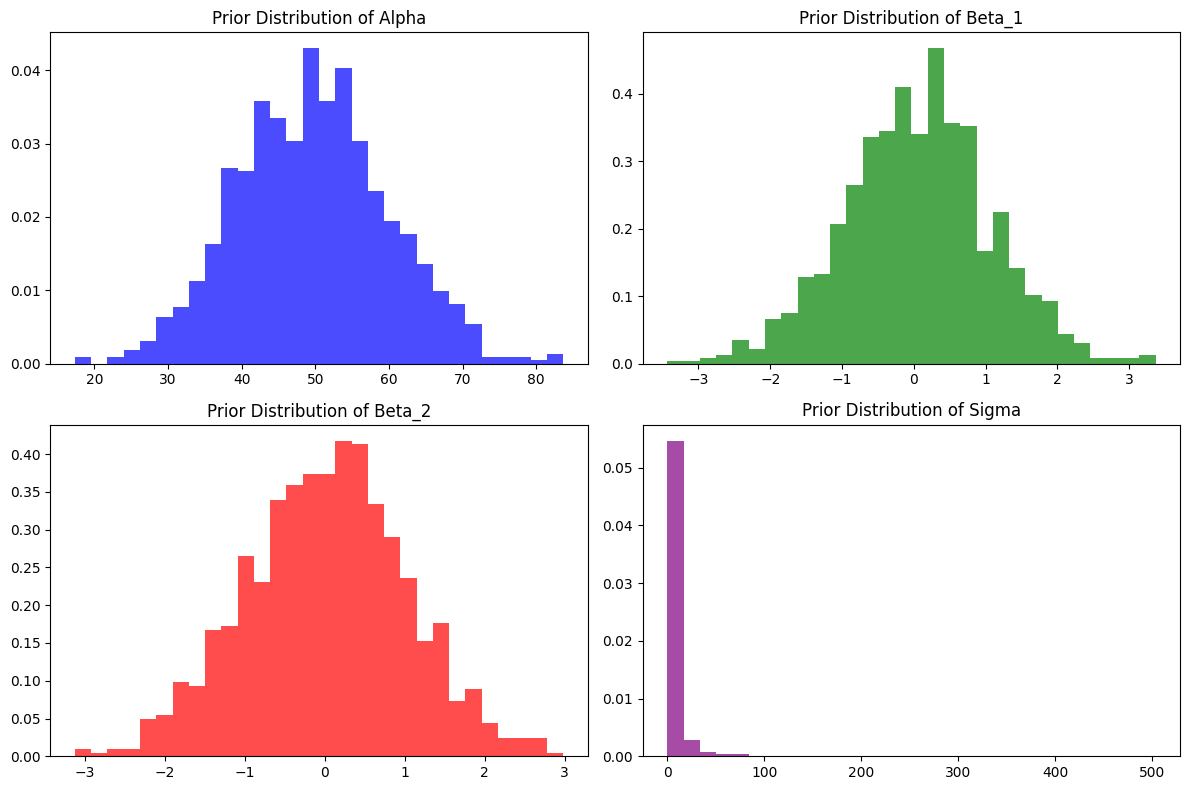

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(50, 10, n_samples)
beta_1_prior = np.random.normal(0, 1, n_samples)
beta_2_prior = np.random.normal(0, 1, n_samples)
sigma_prior = np.random.standard_cauchy(n_samples) * 2
sigma_prior = sigma_prior[sigma_prior > 0]  # Keep only positive values

# Plot the distributions of the simulated prior values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(alpha_prior, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Prior Distribution of Alpha')

plt.subplot(2, 2, 2)
plt.hist(beta_1_prior, bins=30, density=True, alpha=0.7, color='green')
plt.title('Prior Distribution of Beta_1')

plt.subplot(2, 2, 3)
plt.hist(beta_2_prior, bins=30, density=True, alpha=0.7, color='red')
plt.title('Prior Distribution of Beta_2')

plt.subplot(2, 2, 4)
plt.hist(sigma_prior, bins=30, density=True, alpha=0.7, color='purple')
plt.title('Prior Distribution of Sigma')

plt.tight_layout()
plt.show()

Range of Democratic %: 21.9 92.5


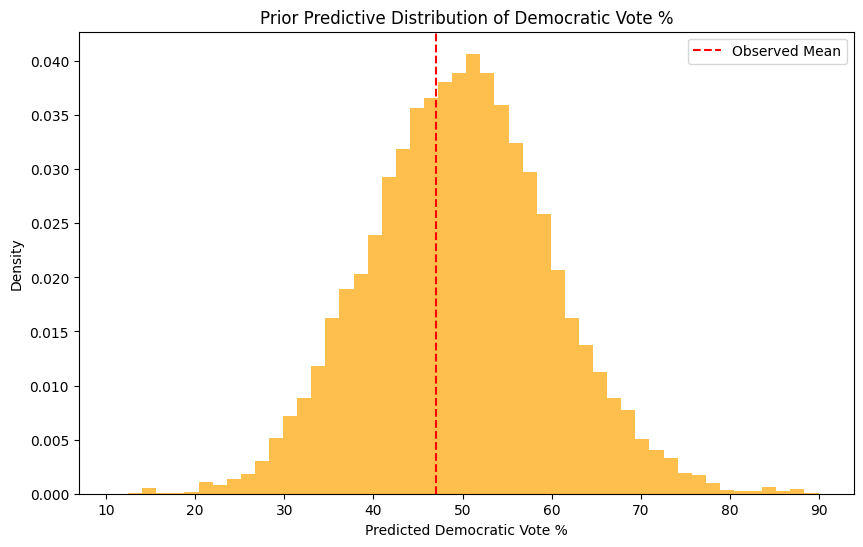

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(50, 10, n_samples)
beta_1_prior = np.random.normal(0, 1, n_samples)
beta_2_prior = np.random.normal(0, 1, n_samples)
sigma_prior = np.random.normal(2, 1, n_samples)
sigma_prior = sigma_prior[sigma_prior > 0]  # Keep only positive values

# Trim other priors to match the length of sigma_prior
n_samples = len(sigma_prior)
alpha_prior = alpha_prior[:n_samples]
beta_1_prior = beta_1_prior[:n_samples]
beta_2_prior = beta_2_prior[:n_samples]

# Clean Gun ownership % data to ensure values are between 0 and 1
data['Gun ownership %'] = np.clip(data['Gun ownership %'], 0, 1)

# Rescale Democratic % to be between 0 and 100
data['Democratic %'] = data['Democratic %'] * 100

# Check the observed Democratic % values
print("Range of Democratic %:", np.min(data['Democratic %']), np.max(data['Democratic %']))

# Prepare for prior predictive checks
N = len(data)
V_prior_pred = np.zeros((n_samples, N))

for i in range(n_samples):
    V_prior_pred[i, :] = (alpha_prior[i] + 
                          beta_1_prior[i] * data['Gun ownership %'].values + 
                          beta_2_prior[i] * data['HDI'].values + 
                          sigma_prior[i] * np.random.randn(N))

# Flatten the array to plot all predictions
V_prior_pred_flat = V_prior_pred.flatten()

# Compute the observed mean
observed_mean = data['Democratic %'].mean()

# Plot the prior predictive distributions
plt.figure(figsize=(10, 6))
plt.hist(V_prior_pred_flat, bins=50, density=True, alpha=0.7, color='orange')
plt.axvline(observed_mean, color='r', linestyle='--', label='Observed Mean')
plt.xlabel('Predicted Democratic Vote %')
plt.ylabel('Density')
plt.title('Prior Predictive Distribution of Democratic Vote %')
plt.legend()
plt.show()

16:59:05 - cmdstanpy - INFO - Chain [1] start processing
16:59:05 - cmdstanpy - INFO - Chain [2] start processing
16:59:05 - cmdstanpy - INFO - Chain [3] start processing
16:59:05 - cmdstanpy - INFO - Chain [4] start processing


Chain [2] method = sample (Default)
Chain [2] sample
Chain [2] num_samples = 1000 (Default)
Chain [2] num_warmup = 1000 (Default)
Chain [2] save_warmup = 0 (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = 1 (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.8 (Default)
Chain [2] kappa = 0.75 (Default)
Chain [2] t0 = 10 (Default)
Chain [2] init_buffer = 75 (Default)
Chain [2] term_buffer = 50 (Default)
Chain [2] window = 25 (Default)
Chain [2] save_metric = 0 (Default)
Chain [2] algorithm = hmc (Default)
Chain [2] hmc
Chain [2] engine = nuts (Default)
Chain [2] nuts
Chain [2] max_depth = 10 (Default)
Chain [2] metric = diag_e (Default)
Chain [2] metric_file =  (Default)
Chain [2] stepsize = 1 (Default)
Chain [2] stepsize_jitter = 0 (Default)
Chain [2] num_chains = 1 (Default)
Chain [2] id = 2
Chain [2] data
Chain [2] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\r03wch9l.json
Chain [2] init = 2 (Default)
Chain [2] random
Chain [2] seed = 2805

16:59:17 - cmdstanpy - INFO - Chain [3] done processing
16:59:17 - cmdstanpy - INFO - Chain [2] done processing
16:59:17 - cmdstanpy - INFO - Chain [4] done processing


Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 4.522 seconds (Warm-up)
Chain [3] 7.027 seconds (Sampling)
Chain [3] 11.549 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 4.87 seconds (Warm-up)
Chain [2] 6.71 seconds (Sampling)
Chain [2] 11.58 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [

16:59:17 - cmdstanpy - INFO - Chain [1] done processing
16:59:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)


Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 4.731 seconds (Warm-up)
Chain [1] 7.149 seconds (Sampling)
Chain [1] 11.88 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsyrkip9_s\model1_with_priors-20240612165905_1.csv, C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsyrkip9_s\model1_with_priors-20240612165905_2.csv, C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsyrkip9_s\model1_with_priors-20240612165905_3.csv, C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsyrkip9_s\model1_with_priors-202

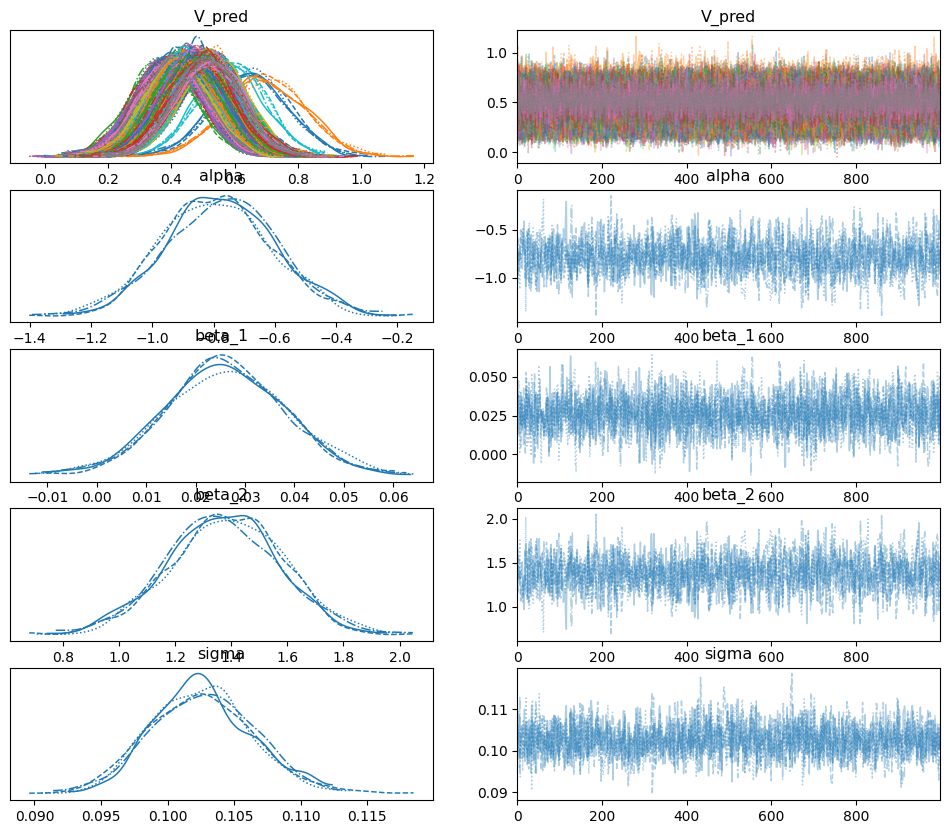

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
V_pred[0]    0.386  0.105   0.182    0.578      0.002    0.001    3530.0   
V_pred[1]    0.402  0.101   0.208    0.590      0.002    0.001    3905.0   
V_pred[2]    0.405  0.101   0.224    0.602      0.002    0.001    3811.0   
V_pred[3]    0.418  0.104   0.214    0.608      0.002    0.001    3886.0   
V_pred[4]    0.422  0.103   0.221    0.607      0.002    0.001    4108.0   
...            ...    ...     ...      ...        ...      ...       ...   
V_pred[407]  0.518  0.102   0.332    0.709      0.002    0.001    3994.0   
alpha       -0.782  0.179  -1.122   -0.452      0.005    0.003    1395.0   
beta_1       0.026  0.012   0.004    0.049      0.000    0.000    2491.0   
beta_2       1.376  0.198   1.003    1.742      0.005    0.004    1403.0   
sigma        0.103  0.004   0.096    0.110      0.000    0.000    2004.0   

             ess_tail  r_hat  
V_pred[0]      3599.0   1.00  
V_pred[1]      3847.0   1

In [35]:
import arviz as az

# Sample from the model
fit = model_1.sample(data=input_model_1, chains=4, seed=28052020, show_console=True)

# Extract the draws
df_fit = fit.draws_pd()

# Check diagnostics
print(fit.diagnose())

# Convert to ArviZ InferenceData
idata = az.from_cmdstanpy(fit)

# Plot trace plots for diagnostics
az.plot_trace(idata)
plt.show()

# Check R-hat values
summary = az.summary(idata)
print(summary)